# Polynomial regression: 
1) you can
use a linear model to fit nonlinear data. A simple way to do this is to add
powers of each feature as new features, then train a linear model on this
extended set of features. This technique is called Polynomial Regression.

2) Note that when there are multiple features, Polynomial Regression is capable
of finding relationships between features (which is something a plain Linear
Regression model cannot do). This is made possible by the fact that
PolynomialFeatures also adds all combinations of features up to the given
degree. For example, if there were two features a and b,
PolynomialFeatures with degree=3 would not only add the features a^2 ,a^3, b^2 , and b^3 , but also the combinations ab, (a^2)b, and a(b^2) .

> WARNING:
PolynomialFeatures(degree=d) transforms an array containing n features into an
array containing (n + d)! / d!n! features , where n! is the factorial of n, equal to 1 × 2 × 3 ×
⋯ × n. Beware of the combinatorial explosion of the number of features!


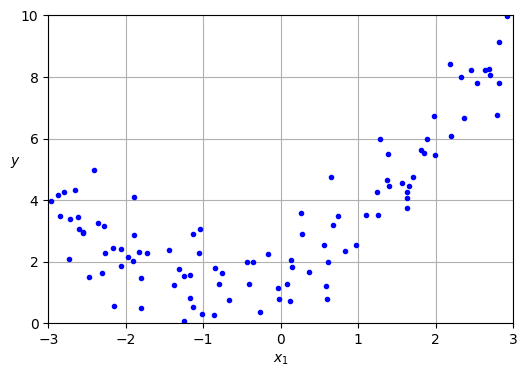

In [4]:
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3 
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [5]:
# Use  PolynomialFeatures class to transform our training data, adding
# the square (second-degree polynomial) of each feature in the training set as a
# new feature 

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]


(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

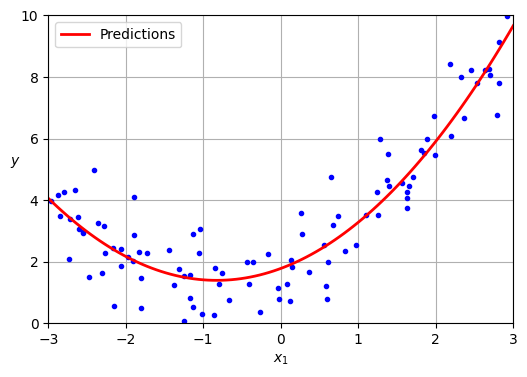

In [8]:
np.random.seed(42)
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.legend(loc="upper left")
plt.grid()
plt.show()

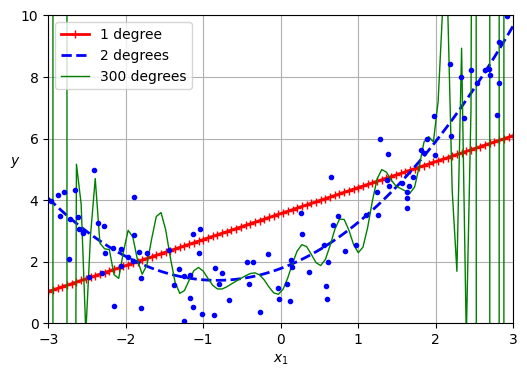

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6,4))

for style, width, degree in (("r-+",2,1),("b--",2,2),("g-",1,300)):
    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features,std_scaler,lin_reg)
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new,y_newbig,style,label=label,linewidth=width)

plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

# Learning Curves

How to Tell if a model is underfitting or overfitting:

1) If a model performs well on the training data
but generalizes poorly according to the cross-validation metrics, then your
model is overfitting. If it performs poorly on both, then it is underfitting.
This is one way to tell when a model is too simple or too complex.

2) Learning Curves: these are plots of the
model’s performance on the training set and the validation set as a function
of the training set size (or the training iteration).

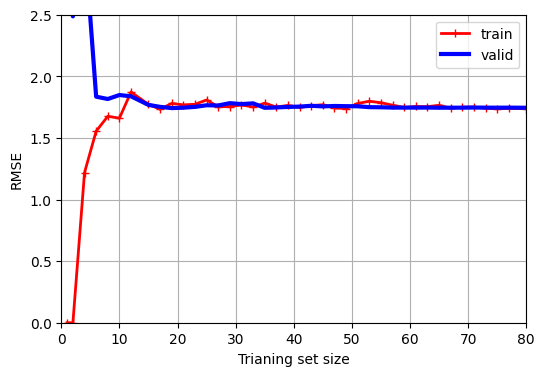

In [12]:
# learning curve

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors,"r-+",linewidth=2,label="train")
plt.plot(train_sizes,valid_errors,"b-",linewidth=3,label="valid")

plt.xlabel("Trianing set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc = "upper right")
plt.axis([0,80,0,2.5])
plt.show()

# Insights: 
1) These learning curves are typical of a model that’s underfitting. Both curves
have reached a plateau; they are close and fairly high.

>Tip: If your model is underfitting the training data, adding more training examples will not
help. You need to use a more complex model or come up with better features

In [13]:
#10th degree polynomial model on same data
from sklearn.pipeline import make_pipeline

polynomial_regression  = make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,X,y,train_sizes = np.linspace(0.01,1.0,40),cv=5,
    scoring="neg_root_mean_squared_error"
)

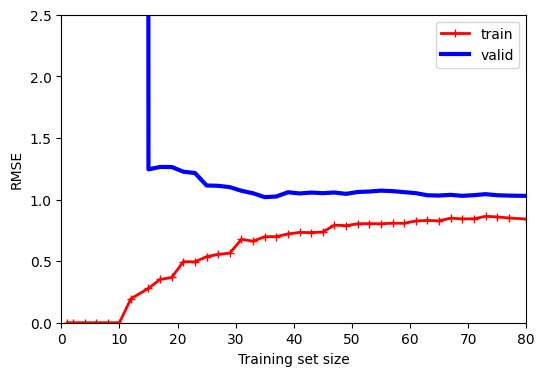

In [15]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors,"r-+",linewidth=2,label="train")
plt.plot(train_sizes,valid_errors,"b-",linewidth=3,label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.grid()
plt.axis([0,80,0,2.5])
plt.show()


# Insights:
1) The error on the training data is much lower than with the Linear Regression model.
2) There is a gap between the curves. This means that the model
performs significantly better on the training data than on the
validation data, which is the hallmark of an overfitting model. If
you used a much larger training set, however, the two curves would
continue to get closer.

>TIP:
One way to improve an overfitting model is to feed it more training data until the
validation error reaches the training error.

# THE BIAS/VARIANCE TRADE-OFF
An important theoretical result of statistics and Machine Learning is the
fact that a model’s generalization error can be expressed as the sum of
three very different errors:
1) Bias
This part of the generalization error is due to wrong assumptions,
such as assuming that the data is linear when it is actually quadratic.
A high-bias model is most likely to underfit the training data.
2) Variance
This part is due to the model’s excessive sensitivity to small
variations in the training data. A model with many degrees of
freedom (such as a high-degree polynomial model) is likely to have
high variance and thus overfit the training data.
3) Irreducible error
This part is due to the noisiness of the data itself. The only way to
reduce this part of the error is to clean up the data (e.g., fix the data
sources, such as broken sensors, or detect and remove outliers).
<br><br>Increasing a model’s complexity will typically increase its variance and
reduce its bias. Conversely, reducing a model’s complexity increases its
bias and reduces its variance. This is why it is called a trade-off.
